# Lighthouse Labs Midterm Project: Predicting Flight Delays

## 1. Introduction and Problem Statement

<b> Objective: </b> The aim of this project is to predict delays in flights in January of 2020 in the United States

*What are the most common causes of flight delays?*


 - <b>Weather</b>: Three different areas where weather can result in flight delays: origin airport, during the flight, destination airport. Origin and destination weather can delay takeoff, this in turn can result in further backlog of flights. 
 
 - <b>Air Traffic</b>: Air and ground congestion can lead to flights getting delayed. If scheduled flight pushes from the gate late, that can also impact the departure of other flights. Go arounds may also occur, where a pilot may deem that it is not safe to land.
 
 - <b>Mechanical Delays</b>: There may be unexpected issues that arise with the aircraft. Can cause delays in takeoff.
 
 - <b>Waiting for Connecting Passengers and Crew</b>: Delay from previous flights can cause delayed flights due to connecting passengers and crew. This may happen more frequently during busy times/operating hours.
 
 - <b>Aircraft Operations</b>: Airports with inefficient operation processes can lead to issues like prolonged security processes, slow baggage turnover, etc. This can result in more frequent delays.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
from scipy.stats import shapiro, ttest_ind
from sklearn.preprocessing import StandardScaler

In [3]:
sns.set_style('ticks')

## 2. Import Data

In order to predict flight delays, we need to obtain historical flight data. For this project, historical flight data for the year 2018-2019 can be found in a Postgres server. The server contains information for approximately 16 million flights in the United States. We randomly extracted approximately 500,000 flights from each year, resulting in 1,000,000 flights for us to perform exploratory data analysis. 

In [4]:
df_2018 = pd.read_csv('../data/flights_data_2018.csv')

In [5]:
df_2018.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-03-31,UA,UA,UA,2384,UA,N76288,2384,11618,EWR,...,1065,0.0,0.0,0.0,0.0,38.0,NaN,NaN,NaN,NaN
1,2018-11-27,DL,DL,DL,1260,DL,N902DN,1260,11884,GEG,...,546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-09-17,AA,AA_CODESHARE,AA,5906,YV,N912FJ,5906,11298,DFW,...,641,0.0,0.0,0.0,0.0,47.0,NaN,NaN,NaN,NaN
3,2018-10-19,G4,G4,G4,2272,G4,252NV,2272,10135,ABE,...,518,654.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,2018-04-24,DL,DL_CODESHARE,DL,5583,EV,N738EV,5583,11042,CLE,...,419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_2018.shape

(500000, 42)

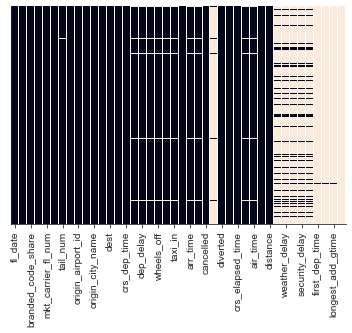

In [7]:
sns.heatmap(df_2018.isna(), yticklabels=False, cbar=False)
sns.despine()
plt.show()

In [8]:
df_2019 = pd.read_csv('../data/flights_data_2019.csv')

In [9]:
df_2019.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-05-19,AA,AA_CODESHARE,AA,4888,PT,N649AE,4888,14704,SBY,...,371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-09-18,DL,DL_CODESHARE,DL,5334,9E,N604LR,5334,10397,ATL,...,774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-08-11,DL,DL,DL,2471,DL,N112DU,2471,12266,IAH,...,1195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-02-02,UA,UA_CODESHARE,UA,4686,AX,N11137,4686,12156,HLN,...,594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-07-15,DL,DL,DL,2118,DL,N106DU,2118,12266,IAH,...,1416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_2019.shape

(500000, 42)

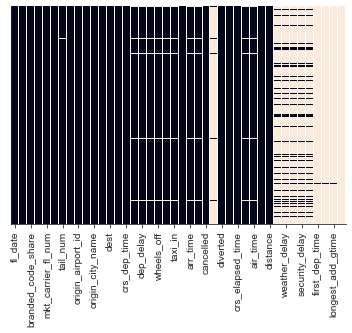

In [11]:
sns.heatmap(df_2018.isna(), yticklabels=False, cbar=False)
sns.despine()
plt.show()

In [12]:
flights_df = pd.concat([df_2018, df_2019])
flights_df.shape

(1000000, 42)

In [13]:
flights_df.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-03-31,UA,UA,UA,2384,UA,N76288,2384,11618,EWR,...,1065,0.0,0.0,0.0,0.0,38.0,NaN,NaN,NaN,NaN
1,2018-11-27,DL,DL,DL,1260,DL,N902DN,1260,11884,GEG,...,546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-09-17,AA,AA_CODESHARE,AA,5906,YV,N912FJ,5906,11298,DFW,...,641,0.0,0.0,0.0,0.0,47.0,NaN,NaN,NaN,NaN
3,2018-10-19,G4,G4,G4,2272,G4,252NV,2272,10135,ABE,...,518,654.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,2018-04-24,DL,DL_CODESHARE,DL,5583,EV,N738EV,5583,11042,CLE,...,419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
flights_df.to_csv('../data/flights_data_merge.csv')

*Which features in our dataset can account for some of the main reasons in flight delays?*

 - <b>fl_date: </b> Corresponds to flight date. Which months do flight delays occur most often? I hypothesize that vacation months (summer, christmas) will have more flights and can lead to greater delays.
 
 - <b> mkt_carrier: </b> Carrier code. Corresponds to the type of airline. Which airlines are most likely to cause delays? I hypothesize that budget airlines are most likely to encounter delays, due to poor operations. 
 
 - <b> destination_id, destination_city, origin_id, origin_city: </b> At which cities do we encounter the most frequent delays? This is also needed to extract weather data. 
 
 - <b> crs_departure_time: </b> What departure times are most likely to cause delays? 
 
 - <b> flights: </b> Number of flights - can provide information regarding air traffic

## 3. Exploratory Data Analysis

### 3.1 Flights Analysis

In [15]:
def extract_features_df(df):
    
    '''
    Extract relevant features from flight dataframe.
        Input: Raw dataframe
        Output: Dataframe with relevant features for analysis
    '''
    
    new_df = df.drop(['branded_code_share', 'mkt_carrier', 'mkt_carrier_fl_num',
                      'op_carrier_fl_num', 'cancellation_code', 'carrier_delay', 'weather_delay', 
                      'nas_delay', 'security_delay', 'late_aircraft_delay', 'first_dep_time',
                      'total_add_gtime', 'longest_add_gtime', 'no_name'], axis=1).dropna()
    
    new_df['fl_date'] = pd.to_datetime(new_df['fl_date'], format='%Y-%m-%d')
    new_df['is_arr_delay'] = new_df.apply(lambda row: 0 if row.arr_delay <= 0 else 1, axis=1)
    
    return new_df

In [16]:
def compute_flight_stats(df):
    
    '''
    Computes total flights in a year, categorized by month and year.
        Input: Dataframe of flights in that year
        Output: Dataframe of total flights separated by months and weekday. Plots figures.
    '''
    if len([df['fl_date'].dt.year[0]]) == 1:
        year = df['fl_date'].dt.year[0]
   
    try:
        if len(df['fl_date'].dt.year[0]) == 2:
            year = '2018-2019'
    except:
        pass
    
    month_flights = df.groupby('fl_date').size().reset_index()
    month_flights = month_flights.groupby(month_flights['fl_date'].dt.month).sum().reset_index()
    month_flights.columns = ['month', 'tot_flights']
    month_delays = df[['fl_date', 'is_arr_delay']].groupby([df['fl_date'].dt.month]).sum().reset_index().rename(columns={'fl_date':'month'})
    month_flights = pd.merge(month_flights, month_delays)
    
    weekday_mapper = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
                      4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
    weekday_flights = pd.DataFrame(df.groupby(df['fl_date'].dt.weekday).size()).reset_index().rename(columns={'fl_date': 'weekday', 0:'tot_flights'})
    weekday_delays = df[['fl_date', 'is_arr_delay']].groupby([df['fl_date'].dt.weekday]).sum().reset_index().rename(columns={'fl_date':'weekday'})
    weekday_flights = pd.merge(weekday_flights, weekday_delays)
    weekday_flights['weekday'] = weekday_flights['weekday'].map(weekday_mapper)
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
    
    sns.set_color_codes('pastel')
    sns.barplot(x='month', y='tot_flights', data=month_flights, color='b', edgecolor='.2', ax=ax[0], label='Total Flights')
    sns.set_color_codes('muted')
    sns.barplot(x='month', y='is_arr_delay', data=month_flights, color='b', edgecolor='.2', ax=ax[0], label='Delayed Flights')
    ax[0].set(xlabel='Month', ylabel='Number of Flights')
    ax[0].set_title(f'{year} Monthly Flight Patterns',fontdict= { 'fontsize': 16, 'fontweight':'bold'}, x =0.3, y=1.05)
    
    sns.set_color_codes('pastel')
    sns.barplot(x='weekday', y='tot_flights', data=weekday_flights, color='b', edgecolor='.2', ax=ax[1], label='Total Flights')
    sns.set_color_codes('muted')
    sns.barplot(x='weekday', y='is_arr_delay', data=weekday_flights, color='b', edgecolor='.2', ax=ax[1], label='Delayed Flights')
    ax[1].set(xlabel='Day of Week', ylabel='Number of Flights')
    ax[1].set_title(f'{year} Weekday Flight Patterns',fontdict= {'fontsize': 16, 'fontweight':'bold'}, x =0.3, y=1.05)
    sns.despine()
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    
    return month_flights, weekday_flights

In [17]:
df_2018 = extract_features_df(df_2018)

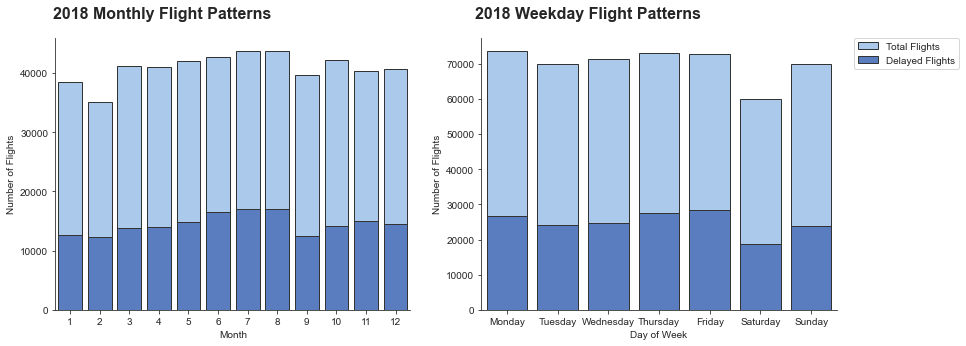

In [18]:
month_flights_2018, weekday_flights_2018 = compute_flight_stats(df_2018)

In [19]:
df_2019 = extract_features_df(df_2019)

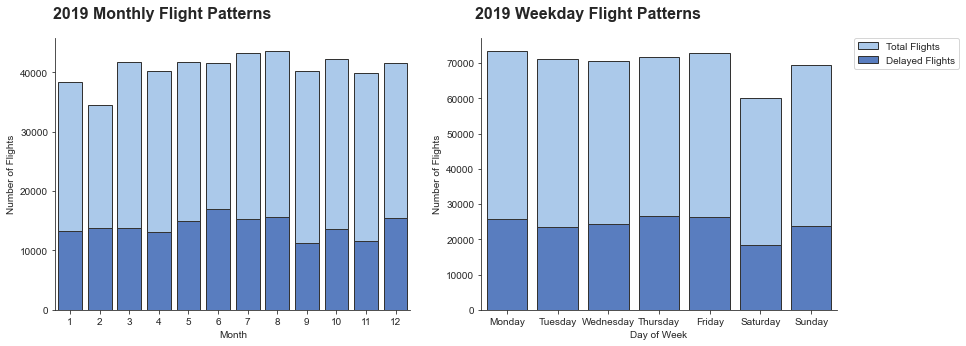

In [20]:
month_flights_2019, weekday_flights_2019 = compute_flight_stats(df_2019)

In [21]:
flights_df = extract_features_df(flights_df)

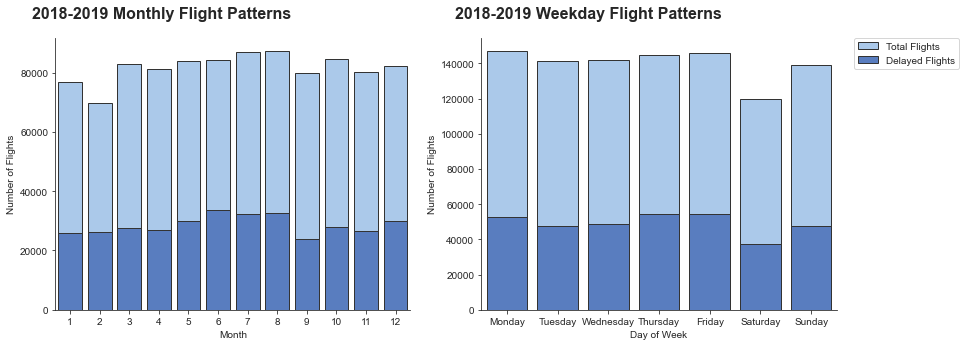

In [22]:
month_flights_all, weekday_flights_all = compute_flight_stats(flights_df)

### 3.2 Airline Analysis

<b> Q1: Which airline has the most flights and delayed flights? </b> 

In [23]:
def compute_airlines_stats(df):
    
    if len([df['fl_date'].dt.year[0]]) == 1:
        year = df['fl_date'].dt.year[0]
   
    try:
        if len(df['fl_date'].dt.year[0]) == 2:
            year = '2018-2019'
    except:
        pass
    
    #Compute total number of flights by each airline
    airlines = df.groupby('mkt_unique_carrier').size().reset_index().rename(columns={0:'num_flights'})
    airlines_delay = df.groupby('mkt_unique_carrier')[['is_arr_delay']].sum().reset_index()
    airlines = pd.merge(airlines, airlines_delay, on='mkt_unique_carrier')
    
    #Plot total flights and delay by airline
    fig, ax = plt.subplots(figsize=(6,4))
    
    sns.set_color_codes('pastel')
    sns.barplot(x='mkt_unique_carrier', y='num_flights', data=airlines, color='b', edgecolor='.2', ax=ax, label='Total Flights')
    sns.set_color_codes('muted')
    sns.barplot(x='mkt_unique_carrier', y='is_arr_delay', data=airlines, color='b', edgecolor='.2', ax=ax, label='Delayed Flights')
    ax.set(xlabel='Airlines', ylabel='Number of Flights')
    ax.set_title(f'{year} Airline Flight Patterns',fontdict= { 'fontsize': 16, 'fontweight':'bold'}, x =0.3, y=1.05)
    sns.despine()
    plt.show()
    
    return airlines
    

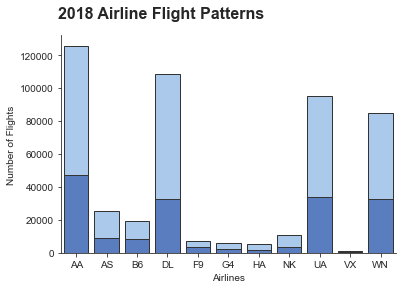

,mkt_unique_carrier,num_flights,is_arr_delay
0,AA,125789,47034
1,AS,25691,8800
2,B6,19253,8302
3,DL,108602,32388
4,F9,7347,3222
5,G4,6055,2400
6,HA,5356,1821
7,NK,11067,3511
8,UA,95437,33639
9,VX,1135,415


In [24]:
compute_airlines_stats(df_2018)

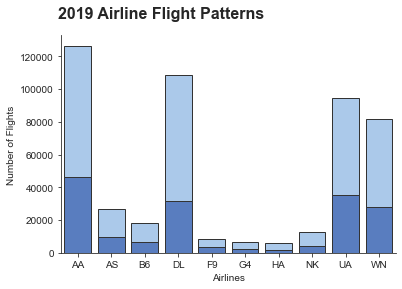

,mkt_unique_carrier,num_flights,is_arr_delay
0,AA,126447,46295
1,AS,26878,9518
2,B6,17986,6837
3,DL,108753,31507
4,F9,8302,3313
5,G4,6495,2453
6,HA,5715,1933
7,NK,12478,4035
8,UA,94681,35112
9,WN,81561,27922


In [25]:
compute_airlines_stats(df_2019)

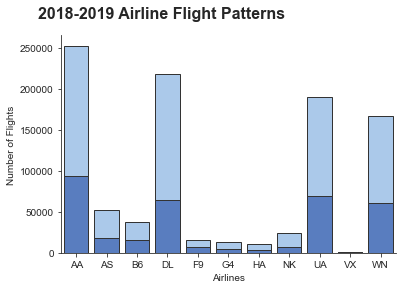

,mkt_unique_carrier,num_flights,is_arr_delay
0,AA,252236,93329
1,AS,52569,18318
2,B6,37239,15139
3,DL,217355,63895
4,F9,15649,6535
5,G4,12550,4853
6,HA,11071,3754
7,NK,23545,7546
8,UA,190118,68751
9,VX,1135,415


In [26]:
compute_airlines_stats(flights_df)

<b> Q2: Most common cities to fly from? Most common destinations? </b>

In [27]:
def get_popular_cities(df):
    
    if len([df['fl_date'].dt.year[0]]) == 1:
        year = df['fl_date'].dt.year[0]
   
    try:
        if len(df['fl_date'].dt.year[0]) == 2:
            year = '2018-2019'
    except:
        pass
    
    cities_origin = df.groupby('origin_city_name').size().sort_values(ascending=False).reset_index().rename(columns={0:'num_flights'})
    cities_dest = df.groupby('dest_city_name').size().sort_values(ascending=False).reset_index().rename(columns={0:'num_flights'})
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6))
    
    sns.set_color_codes('muted')
    sns.barplot(x='num_flights', y='origin_city_name', data=cities_origin[:10], ax=ax[0], color='b', edgecolor='.2')
    ax[0].set(xlabel='Number of Flights', ylabel='')
    ax[0].set_title(f'{year} Most Popular Departure Cities',fontdict= { 'fontsize': 16, 'fontweight':'bold'}, x =0.5, y=1.05)
    
    sns.set_color_codes('muted')
    sns.barplot(x='num_flights', y='dest_city_name', data=cities_dest[:10], ax=ax[1], color='b', edgecolor='.2')
    ax[1].set(xlabel='Number of Flights', ylabel='')
    ax[1].set_title(f'{year} Most Popular Destination Cities',fontdict= { 'fontsize': 16, 'fontweight':'bold'}, x =0.5, y=1.05)
    
    sns.despine()
    plt.show()
   
    return cities_origin, cities_dest

    

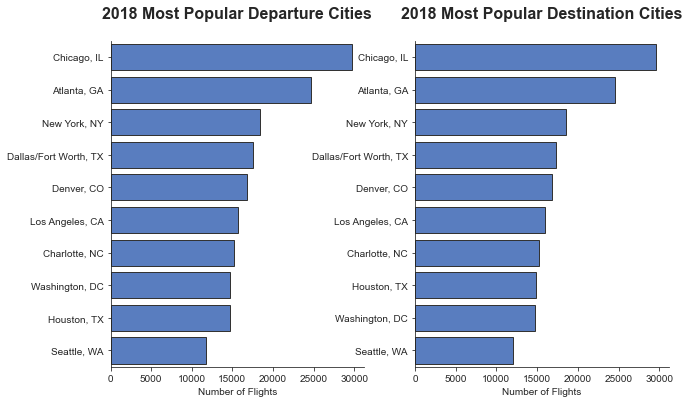

In [28]:
cities_origin_2018, cities_dest_2018 = get_popular_cities(df_2018)

In [29]:
airport_keys = dict(zip(flights_df['origin_city_name'], flights_df['origin']))
airport_keys['New York, NY']
set(flights_df[flights_df['origin_city_name'] == 'Chicago, IL']['origin'])

{'MDW', 'ORD'}

<b> Question 3: Delays by carrier </b>

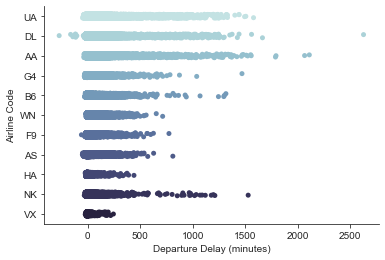

In [39]:
sns.set_style('ticks')
sns.stripplot(x='dep_delay', y='mkt_unique_carrier', data=flights_df, palette="ch:start=.2,rot=-.3")
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Airline Code')
sns.despine()
plt.show()

In [33]:
flights_df['mkt_unique_carrier'].unique()

array(['UA', 'DL', 'AA', 'G4', 'B6', 'WN', 'F9', 'AS', 'HA', 'NK', 'VX'],
      dtype=object)

## 4. EDA Notebook Questions

<b> Task 1: Test the hypothesis that the delay is from a Normal distribution and the mean of the delay is 0. Be careful about outliers. </b>

In [22]:
#No Outliers Removed
arr_delays = flights_df['arr_delay'].to_numpy()
scaler = StandardScaler()
arr_delays = scaler.fit_transform(arr_delays.reshape(-1,1))
shapiro_test = shapiro(arr_delays)
shapiro_test.pvalue
#df.apply(lambda x: (x - np.mean(x)) / (np.std(x))

0.0

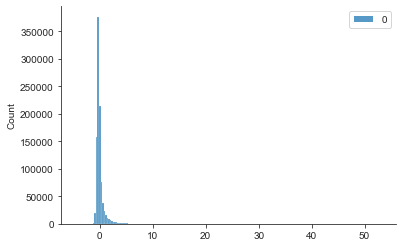

In [23]:
sns.histplot(arr_delays, bins=200)
sns.despine()
plt.show()

In [24]:
#Removing Outliers using IQR
summary_table = flights_df.describe()
IQR = summary_table.loc['75%']['arr_delay'] - summary_table.loc['25%']['arr_delay']
lower_limit = summary_table.loc['25%']['arr_delay'] - (1.5*IQR)
upper_limit = summary_table.loc['75%']['arr_delay'] + (1.5*IQR)

In [25]:
arr_delays = arr_delays[(arr_delays >= lower_limit) & (arr_delays <= upper_limit)]

In [26]:
shapiro_test = shapiro(arr_delays[:1000])
shapiro_test.pvalue

0.0

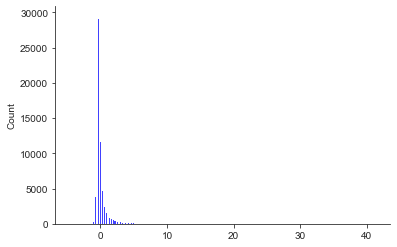

In [27]:
#Histogram of 5000 delay samples, outliers removed
sns.histplot(arr_delays, color='blue')
sns.despine()
plt.show()

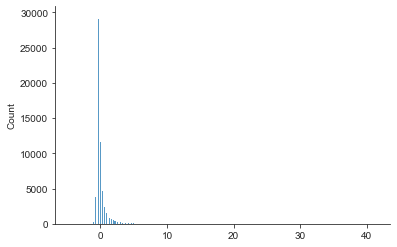

In [28]:
#Histogram of delay samples, outliers removed
sns.histplot(arr_delays)
sns.despine()
plt.show()

In [29]:
test = np.random.normal(loc=-5, scale=4, size=(1000))

<AxesSubplot:ylabel='Count'>

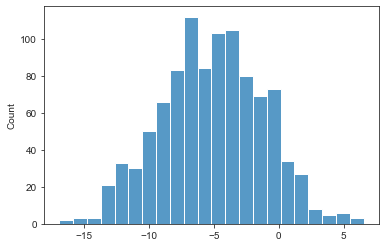

In [30]:
sns.histplot(test)

In [31]:
test2 = shapiro(test)
test2.pvalue

0.23738513886928558

<b> Task 3: Does the weather affect delay? </b>

In [168]:
origin_grouped = flights_df.groupby(['fl_date', 'origin_city_name', 'origin']).size().reset_index().rename(columns={'origin_city_name':'city', 'origin':'air_code'})
destination_grouped = flights_df.groupby(['fl_date', 'dest_city_name', 'dest']).size().reset_index().rename(columns={'dest_city_name':'city', 'dest': 'air_code'})
merged_origin_dest = pd.merge(origin_grouped, destination_grouped, on=['fl_date', 'city','air_code'], how='left').rename(columns={'0_x': 'dep_flights', '0_y': 'arr_flights'}).fillna(0)

In [169]:
merged_origin_dest['total_flights'] = merged_origin_dest['dep_flights'] + merged_origin_dest['arr_flights']
weather_check = merged_origin_dest.groupby('fl_date').apply(lambda row: row.sort_values('total_flights', ascending=False).head(10)).reset_index(drop=True)

In [41]:
weather_df = pd.read_csv('../data/weather_df.csv')

In [43]:
weather_df.head()
weather_df.columns

Index(['Unnamed: 0', 'iata_code', 'date', 'min_temp', 'max_temp', 'avg_temp',
       'total_snowcm', 'windspeed_kmhr', 'precip_mm', 'humidity', 'visibility',
       'cloud_cover', 'heat_indexC', 'wind_chillC', 'wind_gust', 'feels_like',
       'weather_description'],
      dtype='object')

In [341]:
weather_df = weather_df[['iata_code', 'date', 'avg_temp', 'total_snowcm', 'windspeed_kmhr', 'precip_mm', 'visibility', 'cloud_cover', 'wind_gust', 'weather_description']]

In [342]:
weather_df['date'] = pd.to_datetime(weather_df['date'], format='%Y-%m-%d')

In [347]:
weather_df['weather_description'].unique()

array(['Partly cloudy', 'Overcast', 'Sunny', 'Moderate rain',
       'Ice pellets', 'Cloudy', 'Blizzard', 'Blowing snow',
       'Patchy heavy snow', 'Patchy rain possible',
       'Moderate or heavy freezing rain', 'Light snow', 'Light drizzle',
       'Light rain shower', 'Torrential rain shower',
       'Thundery outbreaks possible', 'Patchy light drizzle',
       'Patchy light snow', 'Heavy rain', 'Moderate rain at times',
       'Patchy light rain with thunder', 'Mist', 'Heavy rain at times',
       'Moderate or heavy rain shower', 'Light rain', 'Light sleet',
       'Patchy light rain', 'Heavy snow',
       'Patchy freezing drizzle possible',
       'Moderate or heavy rain with thunder', 'Fog', 'Moderate snow',
       'Patchy moderate snow', 'Patchy snow possible'], dtype=object)

In [350]:
def simplified_weather(weather_desc):
    if ('cloud' in weather_desc.lower()) or ('overcast' in weather_desc.lower()) or ('fog' in weather_desc.lower()) or ('mist' in weather_desc.lower()):
        return 'cloudy'
    elif ('rain' in weather_desc.lower()) or ('drizzle' in weather_desc.lower()) or ('thunder' in weather_desc.lower()):
        return 'rainy'
    elif ('snow' in weather_desc.lower()) or ('ice' in weather_desc.lower()) or ('blizzard' in weather_desc.lower()) or ('sleet' in weather_desc.lower()):
        return 'snow'
    else:
        return 'sunny'

In [351]:
weather_df['weather_summary'] = weather_df['weather_description'].apply(simplified_weather)

In [355]:
weather_df = weather_df[['iata_code', 'date', 'weather_summary']]

In [338]:
airport_codes = ['ATL', 'DCA', 'DFW', 'JFK', 'LAX', 'LGA', 'MSP', 'ORD', 'SEA']

In [361]:
flights_weather_origin = pd.DataFrame(columns=flights_df.columns, dtype=object)

In [362]:
for code in airport_codes:
    df = flights_df[flights_df['origin'] == code]
    flights_weather_origin = pd.concat([flights_weather_origin, df])

In [363]:
flights_weather_origin['is_dep_delay'] = flights_weather_origin.apply(lambda row: 0 if row.dep_delay <= 0 else 1, axis=1)

In [364]:
flights_weather_origin = flights_weather_origin[['fl_date', 'origin', 'dep_delay', 'dest', 'is_dep_delay', 'arr_delay', 'is_arr_delay']]

In [366]:
flights_weather_origin.rename(columns={'fl_date': 'date', 'origin':'iata_code'}, inplace=True)

In [367]:
flights_weather_origin_merge = pd.merge(flights_weather_origin, weather_df, on=['date', 'iata_code'], how='inner')

In [371]:
flights_weather_arrival = pd.DataFrame(columns=flights_df.columns, dtype=object)

In [373]:
for code in airport_codes:
    df = flights_df[flights_df['dest'] == code]
    flights_weather_arrival = pd.concat([flights_weather_arrival, df])

In [376]:
flights_weather_arrival['is_dep_delay'] = flights_weather_arrival.apply(lambda row: 0 if row.dep_delay <= 0 else 1, axis=1)
flights_weather_arrival = flights_weather_arrival[['fl_date', 'origin', 'dep_delay', 'dest', 'is_dep_delay', 'arr_delay', 'is_arr_delay']]

In [379]:
flights_weather_arrival.rename(columns={'fl_date': 'date', 'dest':'iata_code'}, inplace=True)

In [381]:
flights_weather_arrival_merge = pd.merge(flights_weather_arrival, weather_df, on=['date', 'iata_code'], how='inner')

In [387]:
flights_weather_arrival_merge.head()

,date,origin,dep_delay,iata_code,is_dep_delay,arr_delay,is_arr_delay,weather_summary
0,2018-04-04,MCI,-4.0,ATL,0,-8.0,0,cloudy
1,2018-04-04,MLI,48.0,ATL,1,39.0,1,cloudy
2,2018-04-04,AGS,1.0,ATL,1,-10.0,0,cloudy
3,2018-04-04,AGS,4.0,ATL,1,10.0,1,cloudy
4,2018-04-04,CLT,-4.0,ATL,0,9.0,1,cloudy


In [391]:
flights_weather_origin_merge.groupby('weather_summary')[['dep_delay', 'arr_delay']].mean()

,dep_delay,arr_delay
weather_summary,,
cloudy,8.677785,2.731549
rainy,10.914193,5.353397
snow,12.644881,8.124051
sunny,11.538932,6.500837


In [392]:
flights_weather_arrival_merge.groupby('weather_summary')[['dep_delay', 'arr_delay']].mean()

,dep_delay,arr_delay
weather_summary,,
cloudy,9.525319,3.998625
rainy,10.368822,5.244105
snow,12.531449,8.619805
sunny,11.567081,6.743305


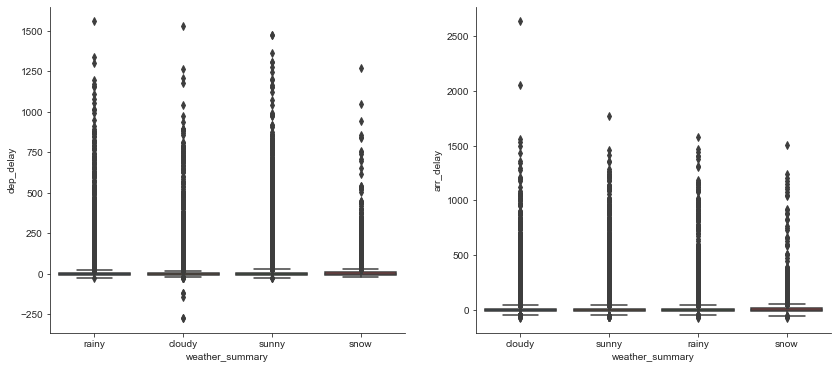

In [388]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

sns.boxplot(x='weather_summary', y='dep_delay', data=flights_weather_origin_merge, ax=ax[0])
sns.boxplot(x='weather_summary', y='arr_delay', data=flights_weather_arrival_merge, ax=ax[1])
sns.despine()
plt.show()

In [411]:
flights_both = flights_df[(flights_df['origin'].isin(airport_codes)) & (flights_df['dest'].isin(airport_codes))]
flights_both['is_dep_delay'] = flights_both.apply(lambda row: 0 if row.dep_delay <= 0 else 1, axis=1)
flights_both = flights_both[['fl_date', 'origin', 'dep_delay', 'dest', 'is_dep_delay', 'arr_delay', 'is_arr_delay']]

In [412]:
origin_weather = weather_df.rename(columns={'iata_code': 'origin'})
arrival_weather = weather_df.rename(columns={'iata_code': 'dest'})
flights_both.rename(columns={'fl_date':'date'}, inplace=True)

In [413]:
#CORRECT
flights_both = pd.merge(flights_both, origin_weather, on=['date', 'origin'], how='inner')

In [414]:
flights_both = pd.merge(flights_both, arrival_weather, on=['date', 'dest'], how='inner')

In [417]:
flights_both.rename(columns={'weather_summary_x':'origin_weather', 'weather_summary_y':'arrival_weather'}, inplace=True)

In [422]:
flights_both_weather = flights_both.groupby(['origin_weather', 'arrival_weather'])[['dep_delay', 'arr_delay']].mean().reset_index()
flights_both_weather

,origin_weather,arrival_weather,dep_delay,arr_delay
0,cloudy,cloudy,8.659502,1.356246
1,cloudy,rainy,8.134951,2.230478
2,cloudy,snow,14.566038,10.754717
3,cloudy,sunny,9.892677,3.983340
4,rainy,cloudy,8.858321,3.371064
5,rainy,rainy,11.915752,5.153325
6,rainy,snow,25.534247,20.931507
7,rainy,sunny,13.973994,9.722480
8,snow,cloudy,20.004630,17.097222
9,snow,rainy,30.165605,24.636943


In [426]:
summary = flights_both[['dep_delay', 'arr_delay']].describe()

In [427]:
summary

,dep_delay,arr_delay
count,45288.000000,45288.000000
mean,11.708841,5.497284
std,48.437967,51.949150
min,-23.000000,-68.000000
25%,-5.000000,-17.000000
50%,-2.000000,-6.000000
75%,8.000000,10.000000
max,1556.000000,1577.000000


In [431]:
IQR_dep = summary.loc['75%']['dep_delay'] - summary.loc['25%']['dep_delay']
lower_limit_dep = summary.loc['25%']['dep_delay'] - (1.5*IQR_dep)
upper_limit_dep = summary.loc['75%']['dep_delay'] + (1.5*IQR_dep)

In [432]:
IQR_arr = summary.loc['75%']['arr_delay'] - summary_table.loc['25%']['arr_delay']
lower_limit_arr = summary.loc['25%']['arr_delay'] - (1.5*IQR_arr)
upper_limit_arr = summary.loc['75%']['arr_delay'] + (1.5*IQR_arr)

In [436]:
flights_both_no_outl=flights_both[(flights_both['dep_delay'] >= lower_limit_dep) & (flights_both['dep_delay'] <= upper_limit_dep) & (flights_both['arr_delay'] >= lower_limit_arr) & (flights_both['arr_delay'] <= upper_limit_arr)]

In [440]:
flights_both_no_outl

,date,origin,dep_delay,dest,is_dep_delay,arr_delay,is_arr_delay,origin_weather,arrival_weather
0,2018-06-21,DFW,2.0,LGA,1,-8.0,0,sunny,sunny
3,2018-06-21,DCA,-5.0,LGA,0,-25.0,0,sunny,sunny
4,2018-06-21,DCA,18.0,LGA,1,23.0,1,sunny,sunny
5,2018-06-21,DCA,1.0,LGA,1,20.0,1,sunny,sunny
6,2018-06-21,ATL,-1.0,LGA,0,-14.0,0,sunny,sunny
...,...,...,...,...,...,...,...,...,...
45281,2019-08-01,JFK,14.0,SEA,1,21.0,1,rainy,sunny
45282,2019-08-01,JFK,-5.0,SEA,0,3.0,1,rainy,sunny
45283,2019-06-22,ATL,-6.0,LGA,0,-10.0,0,rainy,rainy
45284,2019-01-20,JFK,15.0,SEA,1,23.0,1,sunny,snow


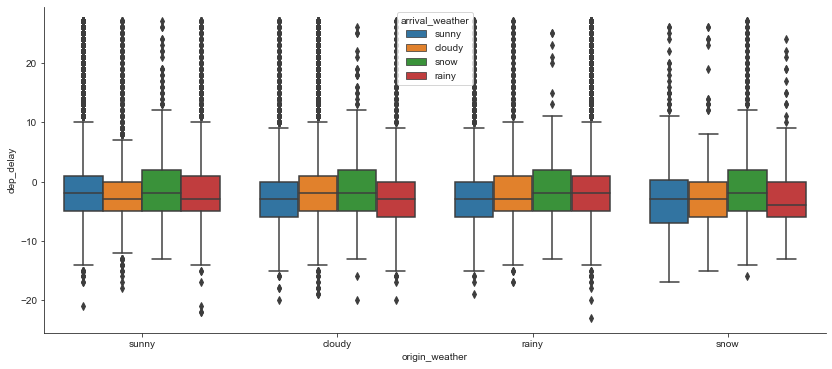

In [441]:
fig, ax = plt.subplots(figsize=(14, 6))

sns.boxplot(x='origin_weather', y='dep_delay', data=flights_both_no_outl, hue='arrival_weather')
sns.despine()
plt.show()

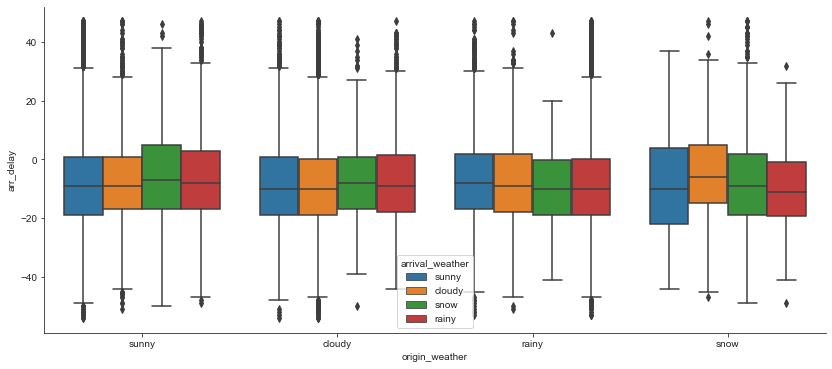

In [442]:
fig, ax = plt.subplots(figsize=(14, 6))

sns.boxplot(x='origin_weather', y='arr_delay', data=flights_both_no_outl, hue='arrival_weather')
sns.despine()
plt.show()

<b> Task 5: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights? </b>

In [33]:
dep_arr_delays = flights_df[['dep_delay', 'arr_delay', 'is_arr_delay']]

In [34]:
dep_arr_delays['before_dep'] = dep_arr_delays.apply(lambda row: 1 if row.dep_delay > 0 and row.arr_delay > 0 else 0, axis=1)

In [35]:
total_arr_delays = dep_arr_delays['is_arr_delay'].value_counts()[1]
dep_arr_delays_count = dep_arr_delays['before_dep'].value_counts()[1]
delay_bef_dep = (dep_arr_delays_count/total_arr_delays) * 100

In [36]:
print(f"Percentage of Delays Created Before Departure: {round(delay_bef_dep, 1)}%")

Percentage of Delays Created Before Departure: 71.3%


In [37]:
dep_arr_delays['delay_change'] = dep_arr_delays['dep_delay'] - dep_arr_delays['arr_delay']
print(f"Airlines are able to lower the average of their delays by {round(dep_arr_delays['delay_change'].mean(),1)} minutes.")

Airlines are able to lower the average of their delays by 5.0 minutes.


<b> Task 7: Test the hypothesis whether planes fly faster when there is the departure delay? </b>

In [38]:
plane_speed_df = flights_df[['distance', 'actual_elapsed_time', 'dep_delay', 'arr_delay', 'is_arr_delay']]

In [39]:
plane_speed_df['plane_speed'] = plane_speed_df['distance']/(plane_speed_df['actual_elapsed_time']/60)
plane_speed_df['is_dep_delay'] = plane_speed_df.apply(lambda row: 0 if row.dep_delay <= 0 else 1, axis=1)
plane_speed_df.head()

,distance,actual_elapsed_time,dep_delay,arr_delay,is_arr_delay,plane_speed,is_dep_delay
0,1065,184.0,46.0,38.0,1,347.282609,1
1,546,112.0,1.0,-10.0,0,292.500000,1
2,641,109.0,54.0,47.0,1,352.844037,1
3,518,89.0,656.0,654.0,1,349.213483,1
4,419,98.0,-10.0,-8.0,0,256.530612,0


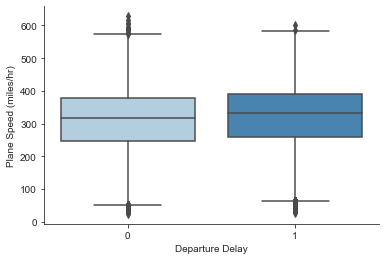

In [40]:
sns.boxplot(x='is_dep_delay', y='plane_speed', data=plane_speed_df, palette='Blues')
plt.xlabel('Departure Delay')
plt.ylabel('Plane Speed (miles/hr)')
sns.despine()
plt.show()

In [41]:
no_delay_speed = plane_speed_df[plane_speed_df['is_dep_delay'] == 0]['plane_speed'][:1000]
delay_speed = plane_speed_df[plane_speed_df['is_dep_delay'] == 1]['plane_speed'][:1000]

In [42]:
speed_test = ttest_ind(no_delay_speed, delay_speed)

In [43]:
speed_test.pvalue

0.3783098609417336

<b> Task 9: Find the top 10 the busiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover? </b>

In [44]:
airport_flights_origin = flights_df.groupby('origin').size().reset_index().rename(columns={0:'origin_flights_count', 'origin':'airport'})
airport_flights_arrival = flights_df.groupby('dest').size().reset_index().rename(columns={0:'arrival_flights_count', 'dest':'airport'})

In [45]:
airport_flights = pd.merge(airport_flights_origin, airport_flights_arrival, on='airport', how='left')

In [269]:
airport_flights['total_arr_dep'] = airport_flights['origin_flights_count'] + airport_flights['arrival_flights_count']
origin_flights_top = airport_flights[['airport', 'origin_flights_count']].sort_values('origin_flights_count', ascending=False)[:10]
arrival_flights_top = airport_flights[['airport', 'arrival_flights_count']].sort_values('arrival_flights_count', ascending=False)[:10]
total_flights_top = airport_flights[['airport', 'total_arr_dep']].sort_values('total_arr_dep', ascending=False)

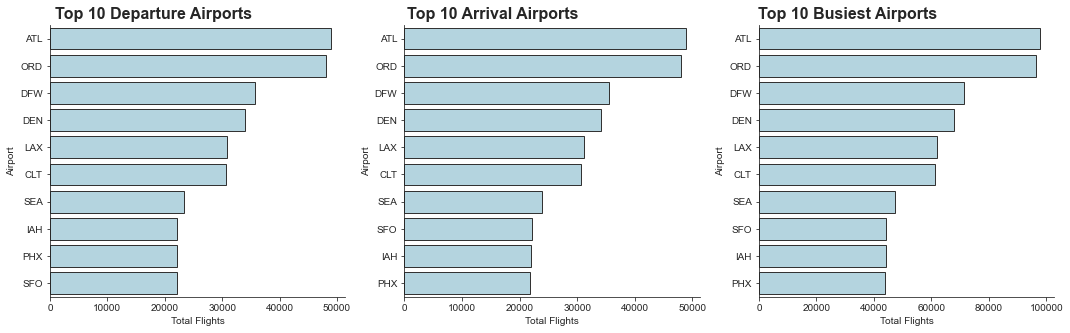

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,5))

sns.barplot(x='origin_flights_count', y='airport', data=origin_flights_top, ax=ax[0], color='lightblue', edgecolor='.2')
ax[0].set(xlabel='Total Flights', ylabel='Airport')
ax[0].set_title(f'Top 10 Departure Airports',fontdict= {'fontsize': 16, 'fontweight':'bold'}, x =0.35, y=1.0)
sns.despine()

sns.barplot(x='arrival_flights_count', y='airport', data=arrival_flights_top, ax=ax[1], color='lightblue', edgecolor='.2')
ax[1].set(xlabel='Total Flights', ylabel='Airport')
ax[1].set_title(f'Top 10 Arrival Airports',fontdict= {'fontsize': 16, 'fontweight':'bold'}, x =0.3, y=1.0)
sns.despine()

sns.barplot(x='total_arr_dep', y='airport', data=total_flights_top, ax=ax[2], color='lightblue', edgecolor='.2')
ax[2].set_title(f'Top 10 Busiest Airports',fontdict= {'fontsize': 16, 'fontweight':'bold'}, x =0.3, y=1.0)
ax[2].set(xlabel='Total Flights', ylabel='Airport')
sns.despine()

In [48]:
origin_flights_top['origin_pct'] = round(origin_flights_top['origin_flights_count']/sum(airport_flights['origin_flights_count']) * 100, 2)
arrival_flights_top['arrival_pct'] = round(arrival_flights_top['arrival_flights_count'] /sum(airport_flights['arrival_flights_count']) * 100, 2)
total_flights_top['total_pct'] = round(total_flights_top['total_arr_dep']/sum(airport_flights['total_arr_dep']) * 100, 2)

In [49]:
print('Total percentage of departures from top 10 airport: ' +  str(sum(origin_flights_top['origin_pct'])) + '%')
print('Total percentage of arrivals from top 10 airport: ' + str(sum(arrival_flights_top['arrival_pct'])) + '%')
print('Total percentage of flights from top 10 airport: ' + str(sum(total_flights_top['total_pct'])) + '%')

Total percentage of departures from top 10 airport: 32.47%
Total percentage of arrivals from top 10 airport: 32.51%
Total percentage of flights from top 10 airport: 32.48%


In [50]:
passengers_df = pd.read_csv('../data/passengers_500k.csv')

In [51]:
passengers_df.head()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
0,0,1,49760,72,0,0,0,660,137,86,...,US,United States,6,622,1,2018,4,2,L,DU
1,0,2,259383,940,0,24431,0,1379,383,327,...,US,United States,8,819,1,2018,8,3,L,DU
2,0,1,35409,148,120,0,0,646,119,99,...,US,United States,6,612,1,2019,7,2,L,DU
3,0,9,865194,2123,1461,138138,0,3671,0,0,...,US,United States,8,873,1,2019,5,8,F,IF
4,0,10,11480,60,12,821,5402,65,371,331,...,US,United States,0,35,1,2018,12,1,F,DU


In [52]:
origin_passengers = passengers_df.groupby('origin')[['passengers']].sum().reset_index().rename(columns={'origin':'airport', 'passengers':'passengers_depart'})
arrival_passengers = passengers_df.groupby('dest')[['passengers']].sum().reset_index().rename(columns={'dest':'airport', 'passengers': 'passengers_arrival'})

In [53]:
passengers_merged = pd.merge(origin_passengers, arrival_passengers, on='airport', how='left').dropna()
passengers_merged.shape

(1700, 3)

In [54]:
df_append = []
for airport in list(total_flights_top['airport']):
    df_append.append(passengers_merged[passengers_merged['airport'] == airport])

passengers_top_airport = pd.concat(df_append)

In [55]:
passengers_top_airport['total_passengers'] = passengers_top_airport['passengers_depart'] + passengers_top_airport['passengers_arrival']

In [56]:
passengers_top_airport['pass_origin_pct'] = round(passengers_top_airport['passengers_depart']/sum(passengers_merged['passengers_depart']) * 100, 2)
passengers_top_airport['pass_arrival_pct'] = round(passengers_top_airport['passengers_arrival']/sum(passengers_merged['passengers_arrival']) * 100, 2)
passengers_top_airport['pass_total_pct'] = round(passengers_top_airport['total_passengers']/sum(passengers_merged['passengers_depart'] + passengers_merged['passengers_arrival']) * 100, 2)

In [57]:
passengers_top_airport.head()

,airport,passengers_depart,passengers_arrival,total_passengers,pass_origin_pct,pass_arrival_pct,pass_total_pct
124,ATL,56367169,54705249.0,111072418.0,5.39,5.23,5.31
1231,ORD,41517030,41490938.0,83007968.0,3.97,3.97,3.97
417,DFW,34795072,35157018.0,69952090.0,3.33,3.36,3.35
415,DEN,31227867,32227936.0,63455803.0,2.99,3.08,3.03
897,LAX,43134741,43358183.0,86492924.0,4.13,4.15,4.14


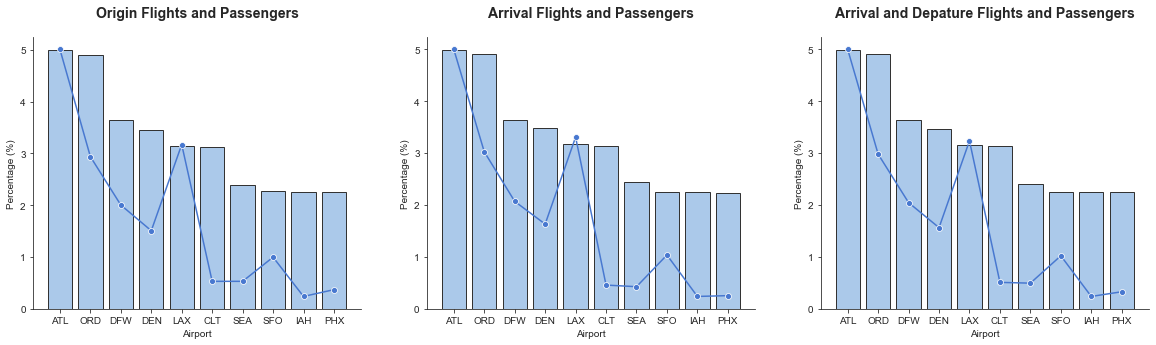

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
    
sns.set_color_codes('pastel')
sns.barplot(x='airport', y='origin_pct', data=origin_flights_top, color='b', edgecolor='.2', ax=ax[0])
sns.set_color_codes('muted')
ax0 = ax[0].twinx()
sns.lineplot(x='airport', y='pass_origin_pct', data=passengers_top_airport, color='b', marker='o', ax=ax0)
ax[0].set(xlabel='Airport', ylabel='Percentage (%)')
ax0.set_axis_off()
ax[0].set_title(f'Origin Flights and Passengers',fontdict= { 'fontsize': 14, 'fontweight':'bold'}, x =0.5, y=1.05)

sns.set_color_codes('pastel')
sns.barplot(x='airport', y='arrival_pct', data=arrival_flights_top, color='b', edgecolor='.2', ax=ax[1])
sns.set_color_codes('muted')
ax1 = ax[1].twinx()
sns.lineplot(x='airport', y='pass_arrival_pct', data=passengers_top_airport, color='b', marker='o', ax=ax1)
ax[1].set(xlabel='Airport', ylabel='Percentage (%)')
ax1.set_axis_off()
ax[1].set_title(f'Arrival Flights and Passengers',fontdict= { 'fontsize': 14, 'fontweight':'bold'}, x =0.5, y=1.05)

sns.set_color_codes('pastel')
sns.barplot(x='airport', y='total_pct', data=total_flights_top, color='b', edgecolor='.2', ax=ax[2])
sns.set_color_codes('muted')
ax2 = ax[2].twinx()
sns.lineplot(x='airport', y='pass_total_pct', data=passengers_top_airport, color='b', marker='o', ax=ax2)
ax[2].set(xlabel='Airport', ylabel='Percentage (%)')
ax2.set_axis_off()
ax[2].set_title(f'Arrival and Depature Flights and Passengers',fontdict= { 'fontsize': 14, 'fontweight':'bold'}, x =0.5, y=1.05)
sns.despine()